In [1]:
import pandas as pd
import numpy as np 

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_excel('HIST_PAINEL_COVIDBR.xlsx')
# df = df.drop(df[df.municipio.isnull()].index)
# df_base = pd.read_excel('HIST_PAINEL_COVIDBR BASE.xlsx')
# df = pd.concat([df_base, df], axis=0)

In [3]:
df = df.drop(df[df.data == '2020-05-30'].index)

In [4]:
a = df[['estado', 'municipio', 'data']].groupby(['estado', 'municipio']).agg(np.count_nonzero)

In [5]:
b = df[df.municipio.notna()][['municipio', 'data']].groupby(['data']).agg(np.count_nonzero)

In [6]:
df2 = pd.DataFrame(columns=b.index, index = a.index)

In [7]:
for uf_mun in df2.index:
    c = df[(df.estado == uf_mun[0]) & (df.municipio == uf_mun[1])][['data', 'casosAcumulado']].set_index('data')
    for data in c.index:
        df2.at[(uf_mun[0], uf_mun[1]), data] = c.loc[data].casosAcumulado

In [8]:
tam = len(df2.columns)
df3 = df2.iloc[:,1:tam]
df3.columns = list(range(0,tam-1))
df4 = df2.iloc[:,0:tam-1]
df4.columns = list(range(0,tam-1))
df5 = df3 - df4
df5.columns = df2.columns[1:]

In [9]:
df5 = df5.fillna(0)
df6 = df5.copy()
for x in df5.index:
    for c in range(0,tam):
        if c >= 7:
            df6.at[x, df2.columns[c]] = df5.loc[x][c-7:c].mean()

In [10]:
q_pico = []
d_pico = []
for x in df6.index:
    q_pico.append(df6.loc[x].max())
    d_pico.append(df6.columns[df6.loc[x].argmax()])

In [11]:
df7 = pd.DataFrame(df6.iloc[:,-1], index=df6.index)
df7['Q_Pico'] = pd.Series(q_pico, index=df6.index)
df7['D_Pico'] = pd.Series(d_pico, index=df6.index)
df7.columns = ['Ult_7_Dias', 'Pico', 'Dia_do_Pico']
df7['Delta %'] = df7['Ult_7_Dias'] / df7['Pico'] - 1
df7 = df7.sort_values('Ult_7_Dias', ascending=False)
df7.head(10)

,,Ult_7_Dias,Pico,Dia_do_Pico,Delta %
estado,municipio,,,,
SP,São Paulo,1609,1609,2020-05-28,0.00
RJ,Rio de Janeiro,1033,1289,2020-05-25,-0.20
AM,Manaus,493,525,2020-05-15,-0.06
PA,Belém,470,470,2020-05-28,0.00
PE,Recife,397,595,2020-05-22,-0.33
DF,Brasília,394,394,2020-05-28,0.00
CE,Fortaleza,383,734,2020-05-10,-0.48
BA,Salvador,346,516,2020-05-25,-0.33
MA,São Luís,260,274,2020-05-25,-0.05


### Número de Casos Confirmados de COVID-19
    Ranking 10 maiores cidades brasileiras - considerando últ 7 dias
    Valores apresentam média diária de casos confirmados em 7 dias
    Atualizado com dados até 16/05/2020
    Data no formato aaaa-mm-dd
    Fonte: Secretarias Estaduais de Saúde. Brasil.
    https://covid.saude.gov.br/

In [16]:
lista_interesse = [('MG', 'Uberlândia'), ('SP', 'Americana'), ('MG', 'Patos de Minas'), ('DF', 'Brasília'), ('MG', 'Patrocínio'), ('MG', 'Araguari'), ('GO', 'São Simão')]
df7.loc[lista_interesse].sort_values('Ult_7_Dias', ascending=False)

Ult_7_Dias  Pico Dia_do_Pico  Delta %
estado municipio                                            
DF     Brasília               394   394  2020-05-28     0.00
MG     Uberlândia              36    36  2020-05-28     0.00
SP     Americana                3     3  2020-04-17     0.00
MG     Patos de Minas           2     2  2020-05-24     0.00
       Patrocínio               0     2  2020-04-02    -1.00
       Araguari                 0     1  2020-05-16    -1.00
GO     São Simão                0     0  2020-03-29      nan

In [13]:
# df5.loc['MG', 'Uberlândia']
# df6.loc['MG', 'Uberlândia']

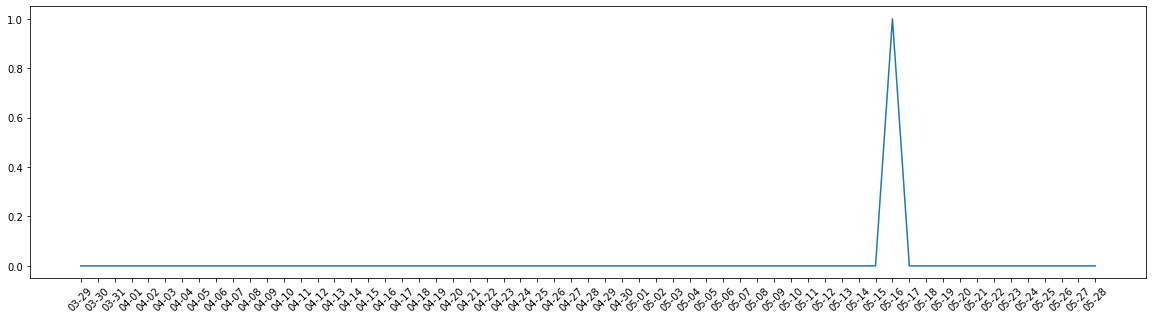

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_plt = df6.loc['MG', 'Araguari']
# dates = pd.date_range('29-03-2020', periods=len(df_plt))

dates = []
for x in df_plt.index:
    if type(x) == str:
        dates.append(x[5:])
    else:
        dates.append(str(x.month) + '-' + str(x.day))
df_plt.index = dates
plt.plot(df_plt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [15]:
# df[df.municipio == 'Rio de Janeiro'].tail(20)